 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

# Whale Returns:

## Read the Whale Portfolio daily returns and clean the data:

In [2]:
# Read whale portfolio into DataFrame:
whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


# Algo Returns:

## Read the Algo Portfolio daily returns and clean the data:

In [5]:
# Read algo portfolio into DataFrame:
algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


# S&P 500 Returns:

## Read the S&P Portfolio closing prices and clean the data:

In [8]:
# Read S&P Closing Prices into DataFrame:
sp_500_path = Path('./Resources/sp500_history.csv')
sp_500_df = pd.read_csv(sp_500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_500_df.sort_index(inplace=True)
sp_500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Count nulls
sp_500_df.isnull().sum()

Close    0
dtype: int64

In [10]:
# Drop nulls
sp_500_df = sp_500_df.dropna().copy()
sp_500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
# did this already

In [11]:
# Check Data Types
sp_500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_500_df['Close'] = sp_500_df['Close'].str.replace('$', '').astype(float)
sp_500_df

C:\Users\Pete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [13]:
# Calculate Daily Returns
sp_500_df = sp_500_df.pct_change()
sp_500_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
sp_500_df = sp_500_df.dropna().copy()
sp_500_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_df = sp_500_df.rename(columns={"Close": "S&P 500"})
sp_500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns_df = whale_df.join([algo_df,sp_500_df],sort=True).dropna().copy()
combined_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

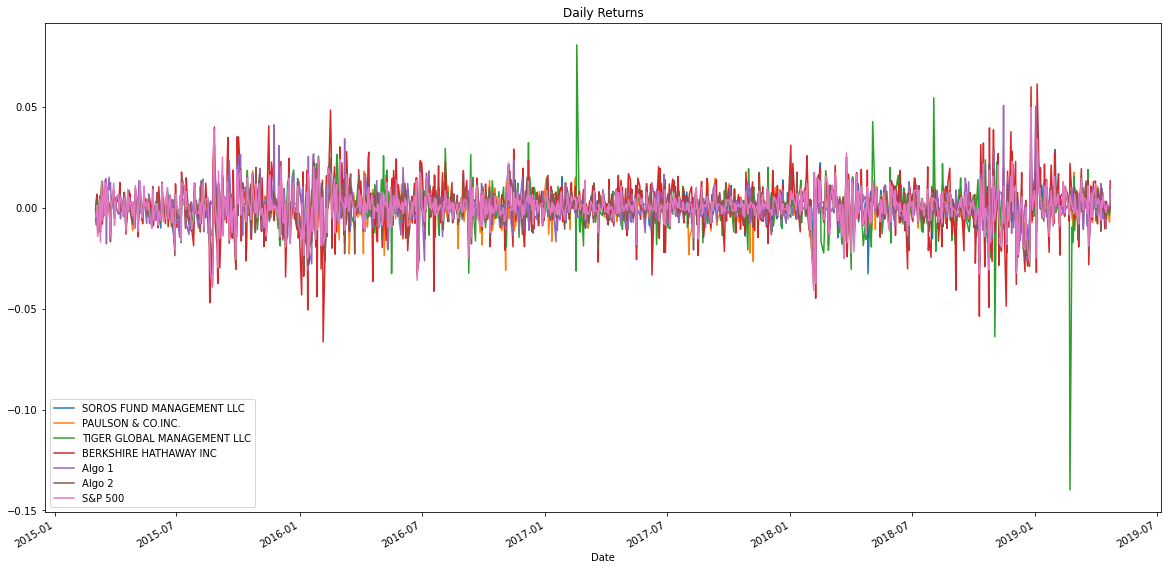

In [17]:
# Plot daily returns of all portfolios
combined_daily_returns_df.plot(figsize = (20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

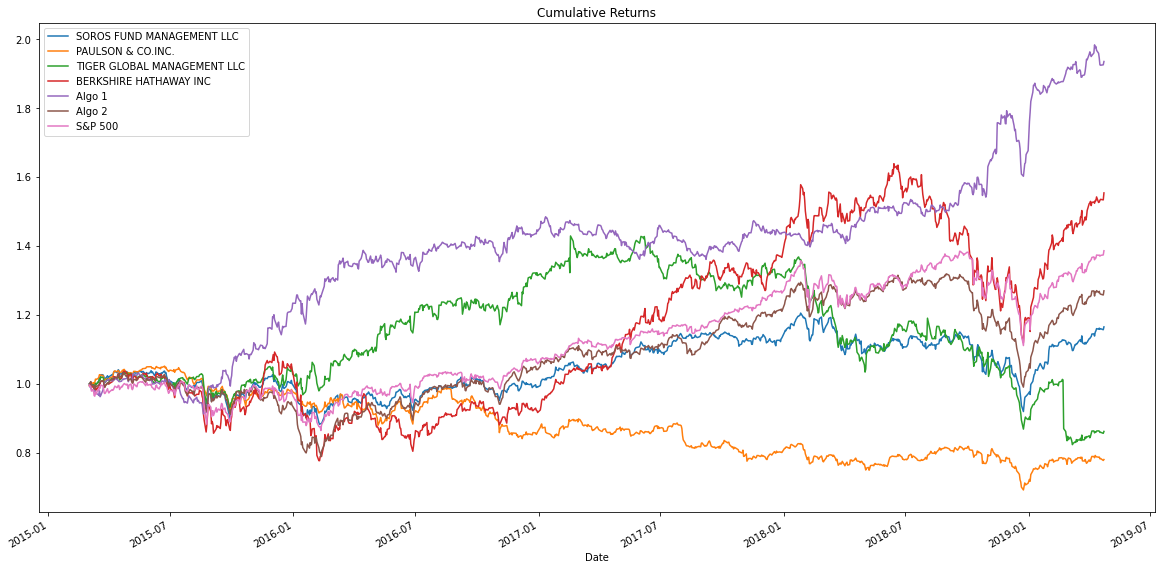

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")

**Based on the above graph it looks like Algo 1 and BERKSHIRE HATHAWAY INC outperform the S&P 500 over the long term. The best performer for the time frame in question was by far Algo 1, which was almost consistently outperforming all other porfolios.**

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns Boxplot'}>

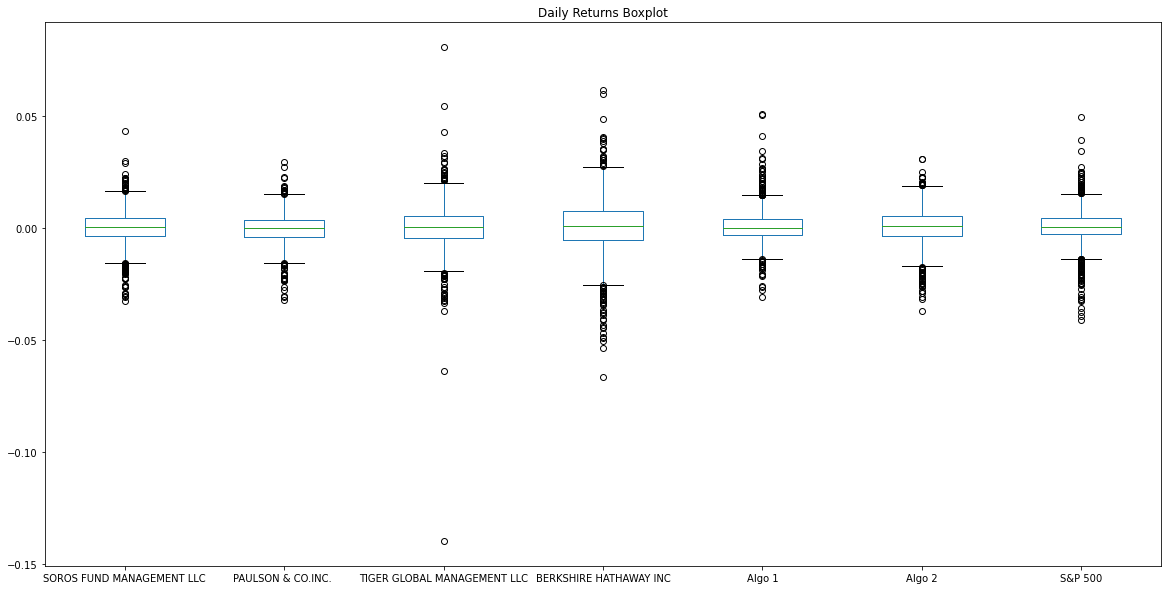

In [19]:
# Box plot to visually show risk
combined_daily_returns_df.plot(kind = 'box', figsize=(20,10), title="Daily Returns Boxplot")


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_daily_returns_df.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp_std = combined_daily_returns_df['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
riskier = combined_std > sp_std
riskier

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P 500                        False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

**Based on the above it seem that the TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have a higher standard deviation, so therefore are more risky than the S&P 500.**

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = combined_std * np.sqrt(252)

# Sort by descending Annualized Standard Deviation 
annualized_std_df_sorted = annualized_std_df.sort_values(ascending=False)
annualized_std_df_sorted

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

**BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC have higher annualized standard deviation than the S&P 500.**

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviation of Daily Price Change'}, xlabel='Date'>

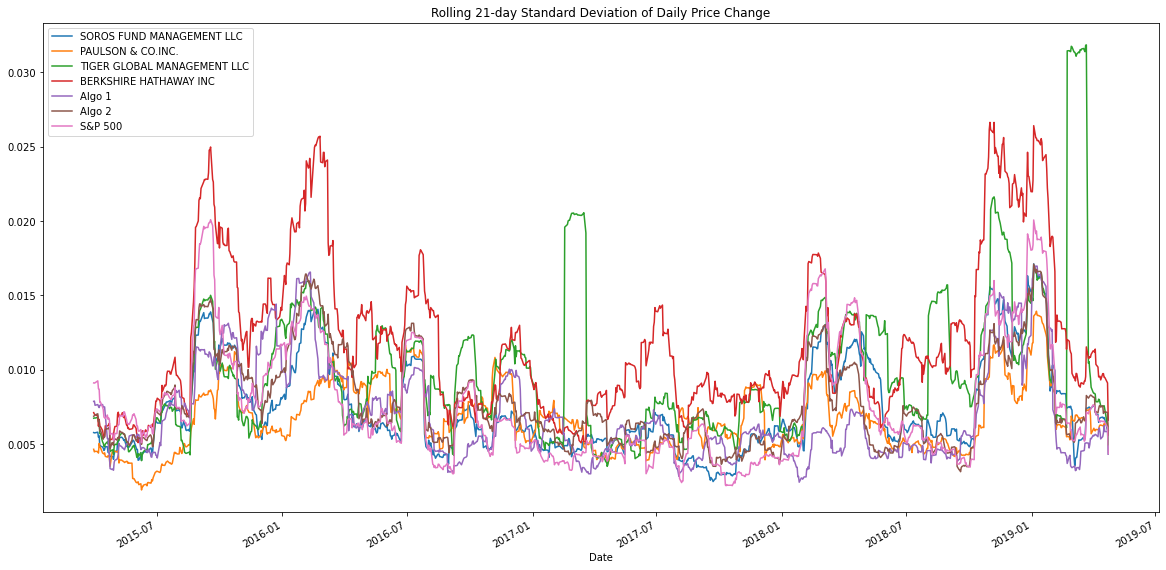

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_rolling_21_day_df = combined_daily_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std_rolling_21_day_df.plot(figsize=(20,10), title = 'Rolling 21-day Standard Deviation of Daily Price Change')

### Calculate and plot the correlation

<AxesSubplot:>

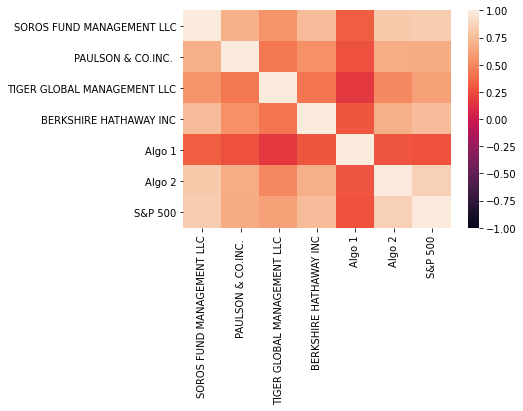

In [24]:
# Calculate the correlation
daily_returns_correlation = combined_daily_returns_df.corr()
# Display de correlation matrix
sns.heatmap(daily_returns_correlation, vmin=-1, vmax=1)

**Based on the above correlation matrix, the Algo 2 ends up being the closest daily returns to the S&P 500.**

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 2'}, xlabel='Date', ylabel='BETA'>

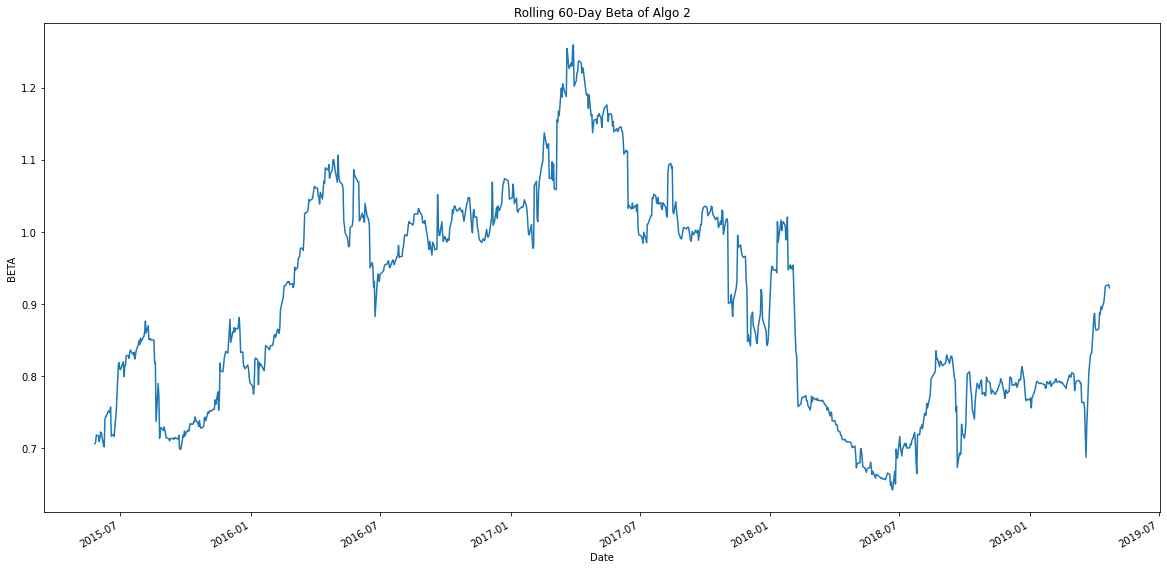

In [25]:
# Calculate covariance of a single portfolio
covariance = combined_daily_returns_df['Algo 2'].cov(combined_daily_returns_df['S&P 500'])
covariance
# Calculate variance of S&P 500
variance = combined_daily_returns_df['S&P 500'].var()
variance
# Computing beta
algo_2_beta = covariance / variance
algo_2_beta
# Plot beta trend
# first calculate rolling covariance for algo 2
rolling_covariance = combined_daily_returns_df['Algo 2'].rolling(window=60).cov(combined_daily_returns_df['S&P 500'])
# calculate rolling variance of S&P 500 daily returns
rolling_variance = combined_daily_returns_df['S&P 500'].rolling(window=60).var()
# calculate Rolling Beta and plot
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 2', ylabel='BETA')

**I chose the Algo 2 for plotting the 60 Day rolling BetaBased on the rolling Beta.  It seems that Algo 2 was more volatile than the S&P 500 from early 2016 to early 2018(with some times of low volatility thrown in there). Before and after those times, it was as volatile or less volatile than the S&P 500.**

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21-Day Exponential Moving Averages of Daily Returns'}, xlabel='Date'>

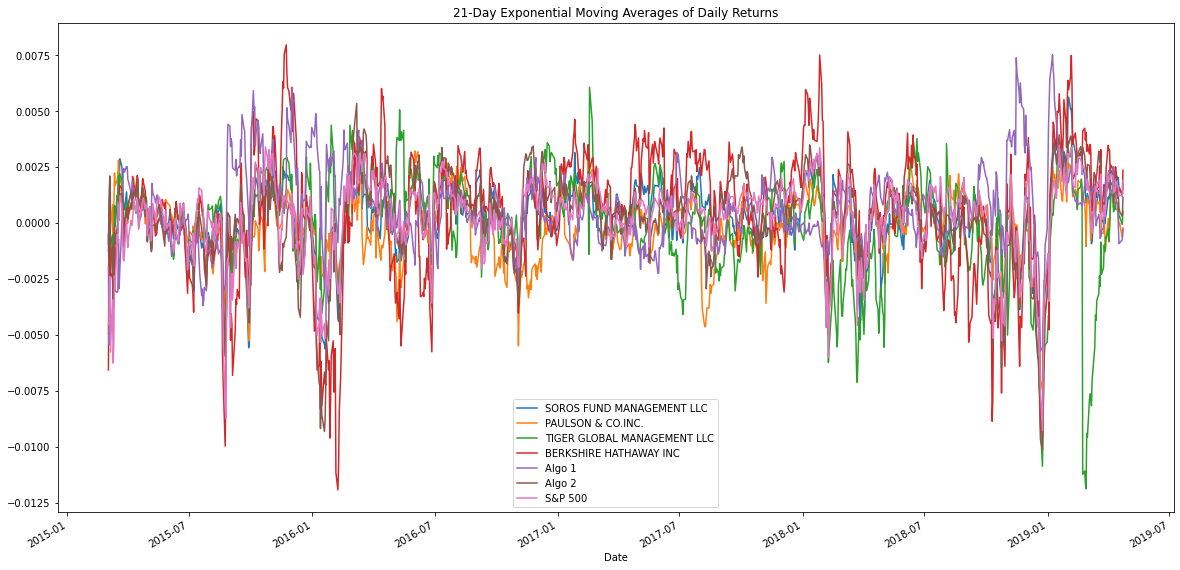

In [26]:
# Use `ewm` to calculate the rolling window
# I set Adjust = True as I did not add in the missing values for the first 20 periods.
rolling_ewm = combined_daily_returns_df.ewm(span = 21, adjust = True).mean()
rolling_ewm

# (1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponential Moving Averages")
rolling_ewm.plot(figsize = (20,10), title="21-Day Exponential Moving Averages of Daily Returns")

**While plotting the 21 day rolling of the average daily returns is probably not super helpful, it does seem to show that that the BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are more volatile as seen from the outlier spikes in the Red and Green lines. This is consistent with the results of the Rolling 21-day Standard Deviation of Daily Price Change as seen above.**

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Non-Annualized Sharpe Ratios
sharpe_ratio = combined_daily_returns_df.mean() / combined_daily_returns_df.std()
# calculate annualized Sharpe Ratio
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharp Ratio'}, xlabel='Portfolio', ylabel='Sharpe Ratio'>

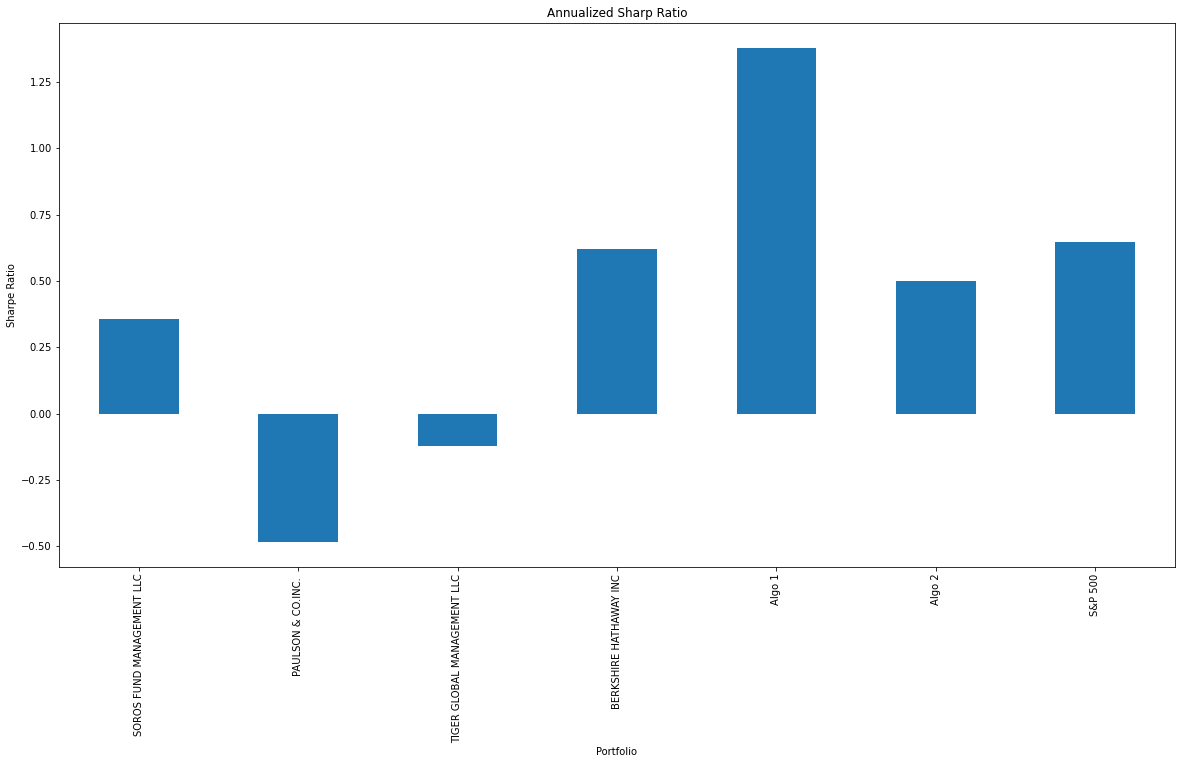

In [28]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind='bar', figsize = (20,10), title='Annualized Sharp Ratio', xlabel='Portfolio', ylabel='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms the S&P 500 **_and_** all of the whale portfolios. Algo 2 underperforms the S&P 500 and BERKSHIRE HATHAWAY INC, but outperforms all other whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, I fetched data from three companies listes in the S&P 500 index.

* `MSFT` - [Microsoft Inc.](https://en.wikipedia.org/wiki/Microsoft)

* `FB` - [Facebook Inc.](https://en.wikipedia.org/wiki/Facebook)

* `NFLX` - [Netflix Inc.](https://en.wikipedia.org/wiki/Netflix)

In [59]:
# Reading data from 1st stock
MSFT_path = Path('./Resources/MSFT.csv')
MSFT_df = pd.read_csv(MSFT_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Pick out only the close column
MSFT_df = MSFT_df['Close']
MSFT_df.sort_index(inplace=True)
MSFT_df.head()

Date
2018-03-01 16:00:00    92.85
2018-03-02 16:00:00    93.05
2018-03-05 16:00:00    93.64
2018-03-06 16:00:00    93.32
2018-03-07 16:00:00    93.86
Name: Close, dtype: float64

In [60]:
# Reading data from 2nd stock
FB_path = Path('./Resources/FB.csv')
FB_df = pd.read_csv(FB_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
FB_df = FB_df['Close']
FB_df.sort_index(inplace=True)
FB_df.head()

Date
2018-03-01 16:00:00    175.94
2018-03-02 16:00:00    176.62
2018-03-05 16:00:00    180.40
2018-03-06 16:00:00    179.78
2018-03-07 16:00:00    183.71
Name: Close, dtype: float64

In [71]:
# Reading data from 3rd stock
NFLX_path = Path('./Resources/NFLX.csv')
NFLX_df = pd.read_csv(NFLX_path, index_col="Date",  infer_datetime_format=True, parse_dates=True)
NFLX_df = NFLX_df['Close']
NFLX_df.sort_index(inplace=True)
NFLX_df.head()

Date
2018-03-01 16:00:00    290.39
2018-03-02 16:00:00    301.05
2018-03-05 16:00:00    315.00
2018-03-06 16:00:00    325.22
2018-03-07 16:00:00    321.16
Name: Close, dtype: float64

In [72]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([MSFT_df, FB_df, NFLX_df], axis="columns", join="inner")
combined_df

,Close,Close,Close
Date,,,
2018-03-01 16:00:00,92.85,175.94,290.39
2018-03-02 16:00:00,93.05,176.62,301.05
2018-03-05 16:00:00,93.64,180.40,315.00
2018-03-06 16:00:00,93.32,179.78,325.22
2018-03-07 16:00:00,93.86,183.71,321.16
...,...,...,...
2019-02-22 16:00:00,110.97,161.89,363.02
2019-02-25 16:00:00,111.59,164.62,363.91
2019-02-26 16:00:00,112.36,164.13,364.97


In [73]:
# Reset Date index
combined_df.reset_index


<bound method DataFrame.reset_index of                       Close   Close   Close
Date                                       
2018-03-01 16:00:00   92.85  175.94  290.39
2018-03-02 16:00:00   93.05  176.62  301.05
2018-03-05 16:00:00   93.64  180.40  315.00
2018-03-06 16:00:00   93.32  179.78  325.22
2018-03-07 16:00:00   93.86  183.71  321.16
...                     ...     ...     ...
2019-02-22 16:00:00  110.97  161.89  363.02
2019-02-25 16:00:00  111.59  164.62  363.91
2019-02-26 16:00:00  112.36  164.13  364.97
2019-02-27 16:00:00  112.17  162.81  362.87
2019-02-28 16:00:00  112.03  161.45  358.10

[251 rows x 3 columns]>

In [74]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['MSFT', 'FB', 'NFLX']
combined_df

,MSFT,FB,NFLX
Date,,,
2018-03-01 16:00:00,92.85,175.94,290.39
2018-03-02 16:00:00,93.05,176.62,301.05
2018-03-05 16:00:00,93.64,180.40,315.00
2018-03-06 16:00:00,93.32,179.78,325.22
2018-03-07 16:00:00,93.86,183.71,321.16
...,...,...,...
2019-02-22 16:00:00,110.97,161.89,363.02
2019-02-25 16:00:00,111.59,164.62,363.91
2019-02-26 16:00:00,112.36,164.13,364.97


In [75]:
# Calculate daily returns
my_portfolio_daily_returns = combined_df.pct_change()
# Drop NAs
my_portfolio_daily_returns.dropna(inplace=True)
my_portfolio_daily_returns.columns = ['MSFT', 'FB', 'NFLX']
# Display sample data
my_portfolio_daily_returns

,MSFT,FB,NFLX
Date,,,
2018-03-02 16:00:00,0.002154,0.003865,0.036709
2018-03-05 16:00:00,0.006341,0.021402,0.046338
2018-03-06 16:00:00,-0.003417,-0.003437,0.032444
2018-03-07 16:00:00,0.005787,0.021860,-0.012484
2018-03-08 16:00:00,0.006073,-0.007457,-0.012953
...,...,...,...
2019-02-22 16:00:00,0.014258,0.011560,0.016948
2019-02-25 16:00:00,0.005587,0.016863,0.002452
2019-02-26 16:00:00,0.006900,-0.002977,0.002913


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [79]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_portfolio_daily_returns.dot(weights)
# Display sample data
portfolio_returns.tail()

Date
2019-02-22 16:00:00    0.014255
2019-02-25 16:00:00    0.008301
2019-02-26 16:00:00    0.002279
2019-02-27 16:00:00   -0.005162
2019-02-28 16:00:00   -0.007582
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [83]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = combined_daily_returns_df.join(portfolio_returns,sort=True)
combined_df.rename(columns = {0:'My Portfolio'}, inplace = True)
combined_df

ValueError: Other Series must have a name

In [82]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


Series([], Name: My Portfolio, dtype: float64)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate std
combined_std = combined_df.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = combined_std * np.sqrt(252)

# Sort by descending Annualized Standard Deviation 
annualized_std_df_sorted = annualized_std_df.sort_values(ascending=False)
annualized_std_df_sorted

FB      466.222264
NFLX    393.579611
MSFT    325.137125
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviation of Daily Price Change'}, xlabel='Date'>

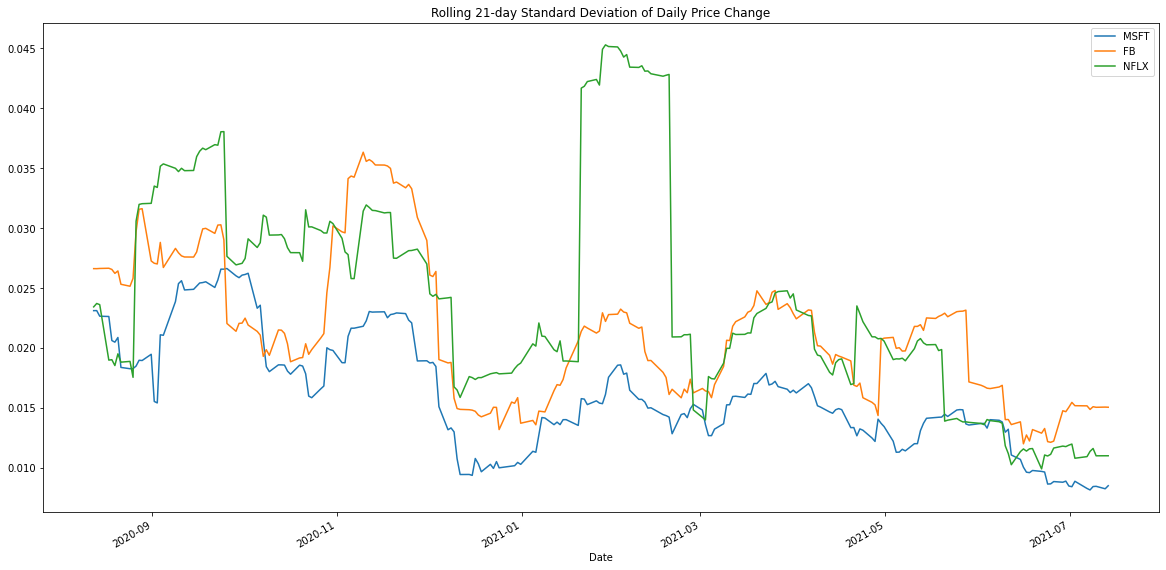

In [49]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_rolling_21_day_df = combined_daily_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std_rolling_21_day_df.plot(figsize=(20,10), title = 'Rolling 21-day Standard Deviation of Daily Price Change')


### Calculate and plot the correlation

<AxesSubplot:>

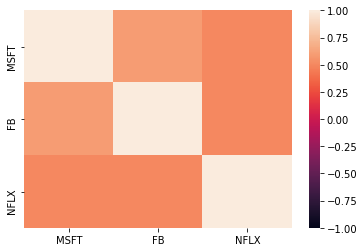

In [50]:
# Calculate the correlation
daily_returns_correlation = combined_daily_returns_df.corr()
# Display de correlation matrix
sns.heatmap(daily_returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = combined_daily_returns_df.cov(combined_daily_returns_df['S&P 500'])
covariance
# Calculate variance of S&P 500
variance = combined_daily_returns_df['S&P 500'].var()
variance
# Computing beta
algo_2_beta = covariance / variance
algo_2_beta
# Plot beta trend
# first calculate rolling covariance for algo 2
rolling_covariance = combined_daily_returns_df['Algo 2'].rolling(window=60).cov(combined_daily_returns_df['S&P 500'])
# calculate rolling variance of S&P 500 daily returns
rolling_variance = combined_daily_returns_df['S&P 500'].rolling(window=60).var()
# calculate Rolling Beta and plot
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 2', ylabel='BETA')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!